In [20]:
#Data Manipulation
import pandas as pd
import numpy as np

#Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Read Data into a variable 'data'
data = pd.read_csv(r'D:\DePaul\DSC 441\letter-recognition.data', header = None)

display(data.head())
display(data.tail())

#Seperate Predictors and class labels
y = data.iloc[:,0]
X = data.iloc[:,1:]

#Encode class labels as integers
y = y.astype("category")
y = y.cat.codes;

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [42]:
#Split the data using the hold-out method into a train and a test set
XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size = 0.8, random_state = 0)
len(yTest)

4000

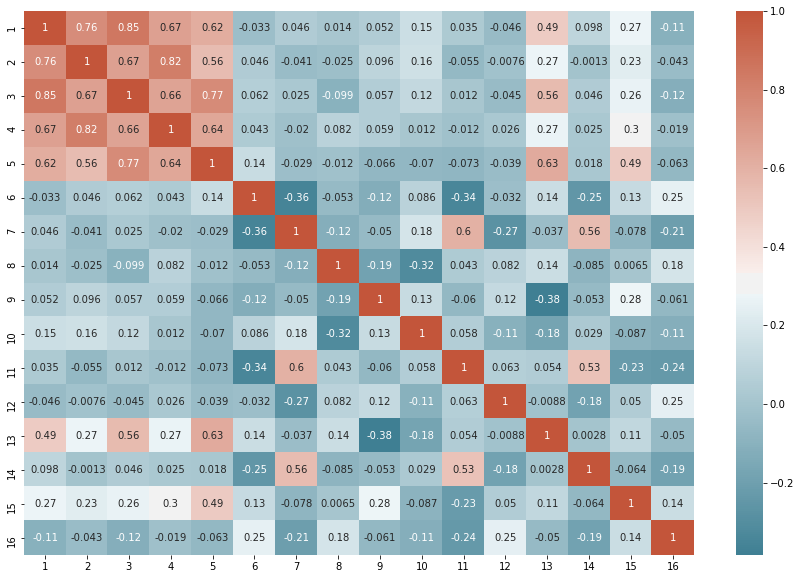

In [39]:
#Visualize the correlation of feautres
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The first 5 features are pretty correlated but this is due to the domain of the image. 

In [48]:
#Set the neighbor list
neighbors = [1, 3, 5, 7]

report = []

#Iterate over the neighbors
for i in neighbors:
    
    #Create the model
    nbrs = KNeighborsClassifier(n_neighbors = i)
    
    nbrs.fit(xTrain, yTrain)
    
    predict = nbrs.predict(xTest)
    
    #Display evaluation metrics for the models
    print('\n\nFor {} neighbors'.format(i))
    print('\n',classification_report(yTest, predict))



For 1 neighbors

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.91      0.94      0.92       158
           2       0.97      0.99      0.98       156
           3       0.96      0.95      0.96       171
           4       0.96      0.94      0.95       145
           5       0.96      0.94      0.95       167
           6       0.98      0.94      0.96       182
           7       0.92      0.90      0.91       123
           8       0.98      0.98      0.98       127
           9       0.96      0.97      0.96       159
          10       0.96      0.92      0.94       143
          11       0.98      0.99      0.98       159
          12       0.98      0.97      0.97       173
          13       0.96      0.98      0.97       134
          14       0.94      0.97      0.96       142
          15       0.97      0.95      0.96       165
          16       0.97      0.98      0.97       145
       

### Results

My study achieved accuracte results of 96% correct classification. One thing I look to do in the future is apply the ROC curve to this problem, or a similar one. ROC curves are very useful in determining True Positive to False Positive Rates for binary classification problems. Because this problem is multi class, I will first need to binarize it, having a target feature for each class and marking a 1 if it is a positive and 0 if it is negative. Because my code already encoded the classes to integers, this should be especially easy to do.